In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt


In [33]:
num_input = 3

In [12]:

def random_walk_cgraph(graph_size ,steps, visit_counts):
    x_pos = 0
    probabilities = [-1, 1]
    x_li = [x_pos]
    visit_counts[0][x_pos] += 1

    for i in range(1, steps):
        x_pos += random.choice(probabilities)
        x_li.append(x_pos % graph_size)
        visit_counts[i][x_pos % graph_size] += 1

    return x_li



In [13]:
def calc_values(graph_size, steps, reps=1024):
    steps = steps + 1
    
    visit_counts = [np.zeros(graph_size) for _ in range(steps)]

    for i in range(reps):
        random_walk_cgraph(graph_size, steps, visit_counts)

    node_prob = [np.zeros(graph_size) for _ in range(steps)]
    for i in range(steps):
        node_prob[i] = visit_counts[i] / reps
        
    return node_prob

In [20]:
def plot_steps(values, max_steps):
    graph_size = 2**3
    
    fig, axs = plt.subplots(3, 7, figsize=(24, 10))
    axs = axs.flatten()
    for i in range(max_steps+1):
        filtered = np.zeros(graph_size)
        for j, val in enumerate(values[i]):
            filtered[j] = filtered[j] + val
        axs[i].bar(range(graph_size), filtered)
        axs[i].set_title(f"Step {i}")
        axs[i].set_ylim(0, 1)
        axs[i].set_xlabel("Position state")
        axs[i].set_ylabel("Probability")

    
    plt.tight_layout()
    plt.show()


In [ ]:
def plot_step(values, step):
    graph_size = 2**num_input
    
    fig, axs = plt.subplots(1, 1, figsize=(24, 10))
    
    filtered = np.zeros(graph_size)
    for j, val in enumerate(values[step]):
        filtered[j] = filtered[j] + val
    axs.bar(range(graph_size), filtered)
    axs.set_title(f"Step {step+1}")
    axs.set_ylim(0, 1)
    axs.set_xlabel("Position state")
    axs.set_ylabel("Probability")

    
    plt.tight_layout()
    plt.show()

In [26]:
def plot_spectral(values, steps, node):
    y_values = [values[step][node] for step in range(node % 2, steps+1, 2)]
    x_values = range(node % 2, steps+1, 2)
    
    fig, axs = plt.subplots(1, 1, figsize=(24, 10))

    axs.plot(x_values, y_values, '-o')
    
    axs.set_title(f"Spectral plot for node {node}")
    axs.set_ylim(0, 1)
    axs.set_xlabel("Step")
    axs.set_ylabel(f"Probability at node: {node}")
    
    plt.tight_layout()
    plt.show()

In [67]:
def plot_spectral_all(values, steps, even_nodes=0):
    np_vals = np.array(values).T
    x_values = range(even_nodes % 2, steps+1, 2)
    
    fig, axs = plt.subplots(1, 1, figsize=(24, 10))

    print(len(np_vals))
    for i in range(even_nodes % 2, 2**num_input, 2):
        axs.plot(x_values, np_vals[i][even_nodes % 2:steps+1:2], '-o', label=f"Node {i}")
    
    # axs.plot(x_values, y_values, '-o')
    
    
    tit = ''
    if even_nodes == 0: 
        tit = 'even' 
    else: 
        tit = 'odd'

    axs.set_title(f"Spectral plot for {tit} nodes on {tit} steps", fontsize=30)
    axs.set_ylim(0, 1)
    axs.set_xlabel("Step", fontsize=25)
    axs.set_ylabel(f"Probability at node", fontsize=25)
    
    axs.legend(title="Node", fontsize=15, title_fontsize=22)
    
    plt.tight_layout()
    plt.show()

In [34]:
def plot_heat_map(values, steps):
    # y_values = [values[step][0] for step in range(steps + 1)]
    np_vals = np.array(values)
    
    fig, axs = plt.subplots(figsize=(24, 10))
    im = axs.imshow(np_vals.T, aspect='auto', origin='lower',
                   extent=[0, steps, 0, 2**num_input - 1],
                   cmap='jet', vmin=0, vmax=1)

    axs.set_title(f"Spectral heatmap of all nodes")
    axs.set_xlabel("Step")
    axs.set_ylabel("Node")

    fig.colorbar(im, ax=axs, label='Probability')
    
    plt.tight_layout()
    plt.show()

In [15]:
values = calc_values(2**3, 200)

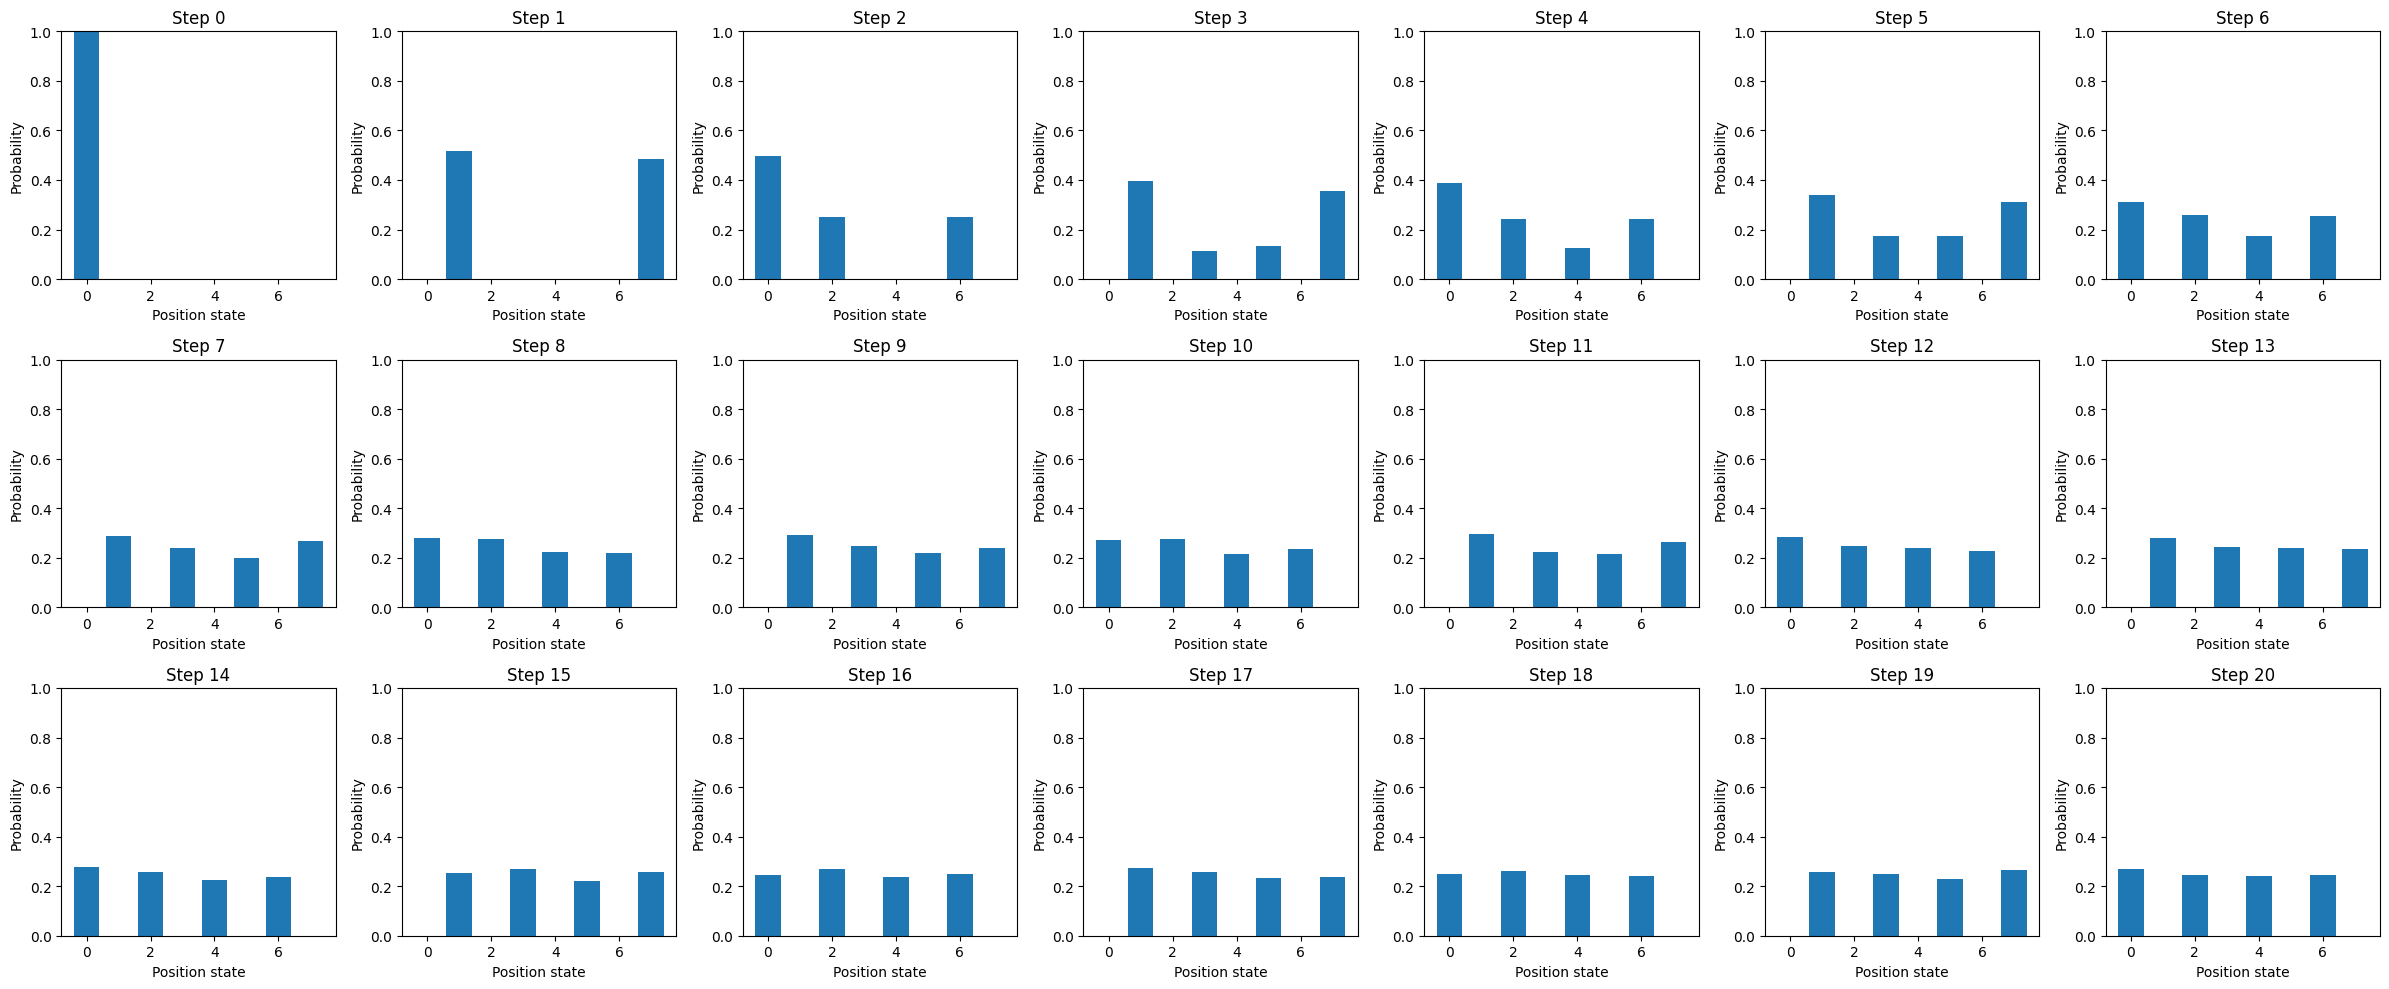

In [21]:
plot_steps(values, 20)

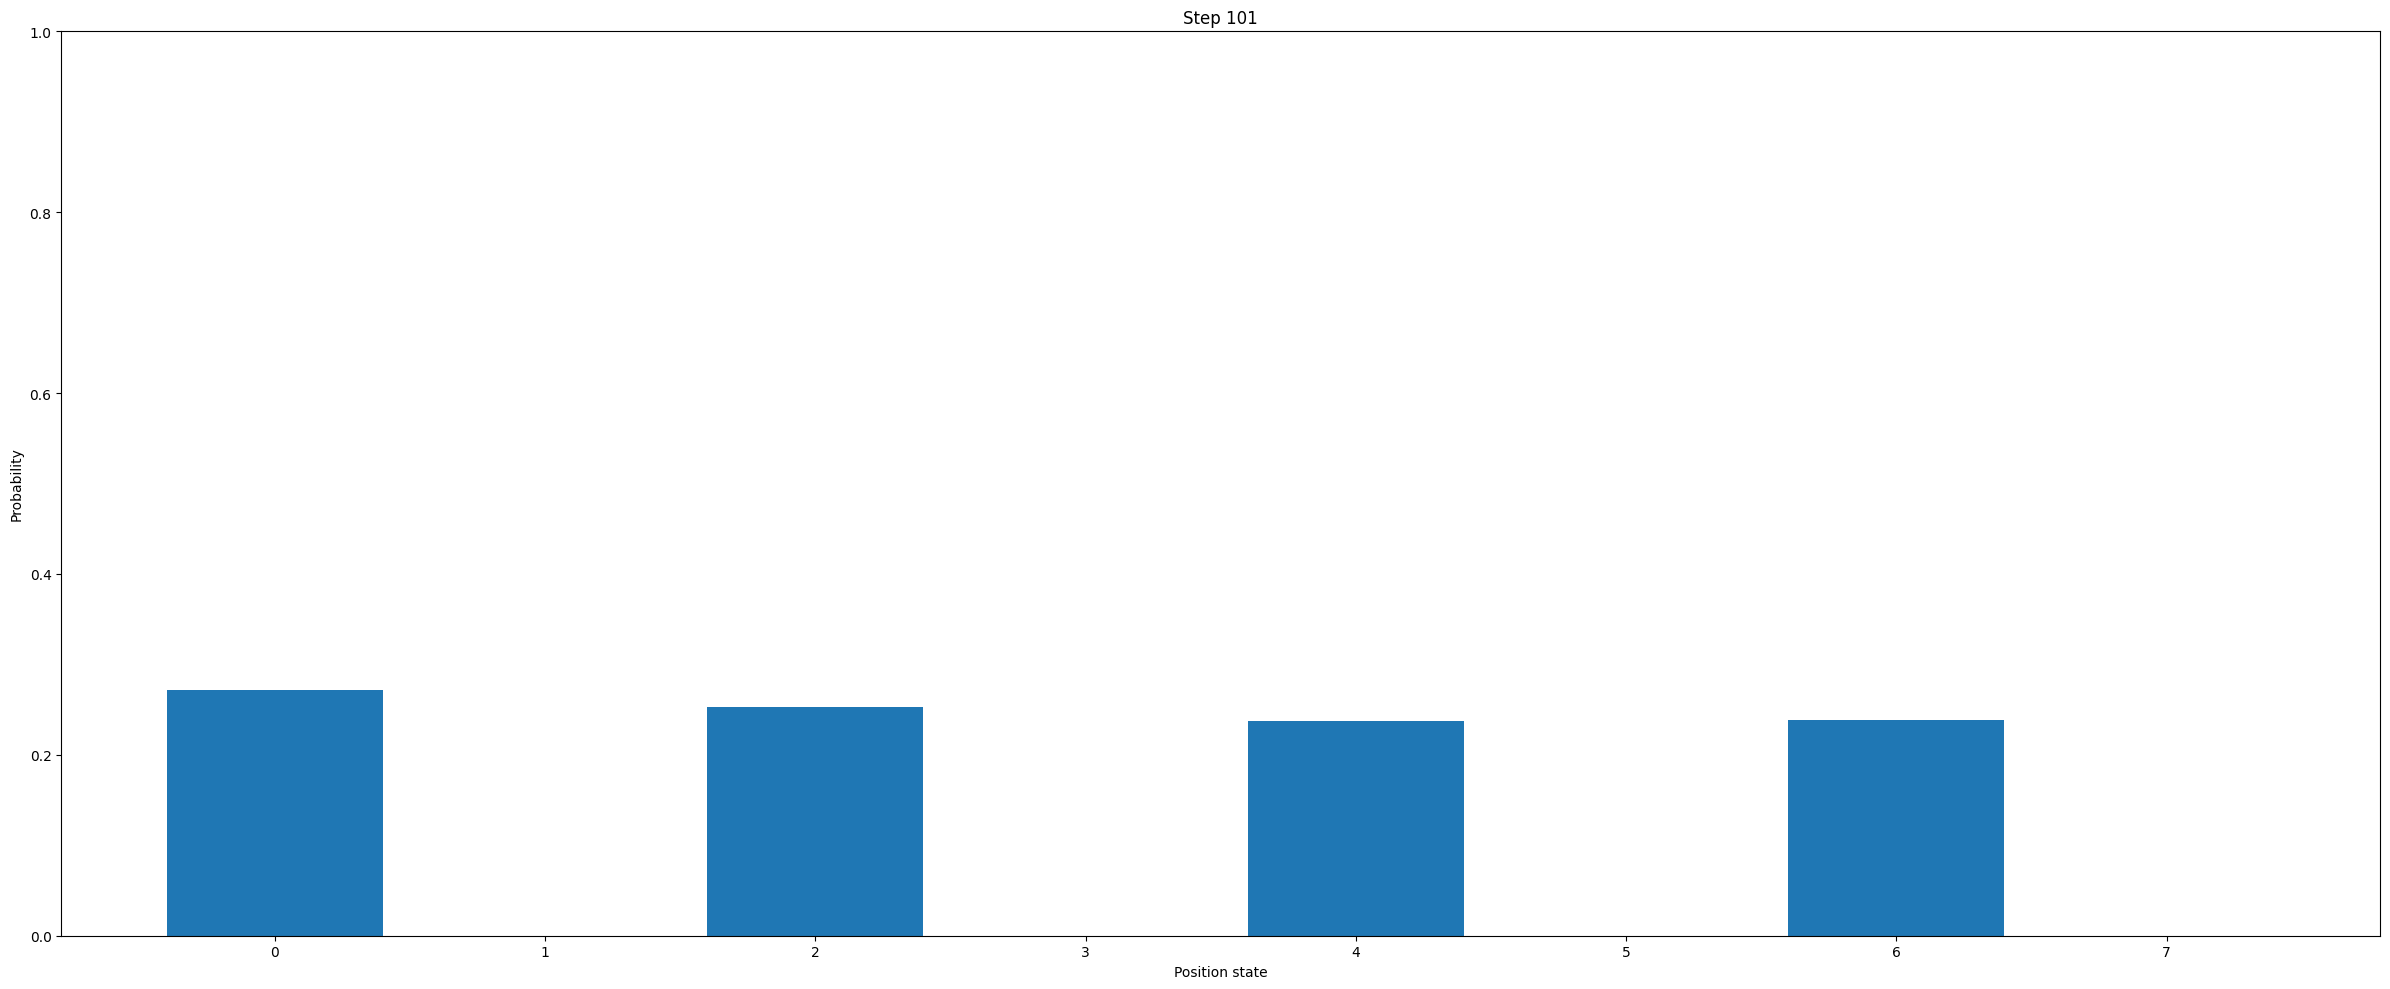

In [25]:
plot_step(values, 100)

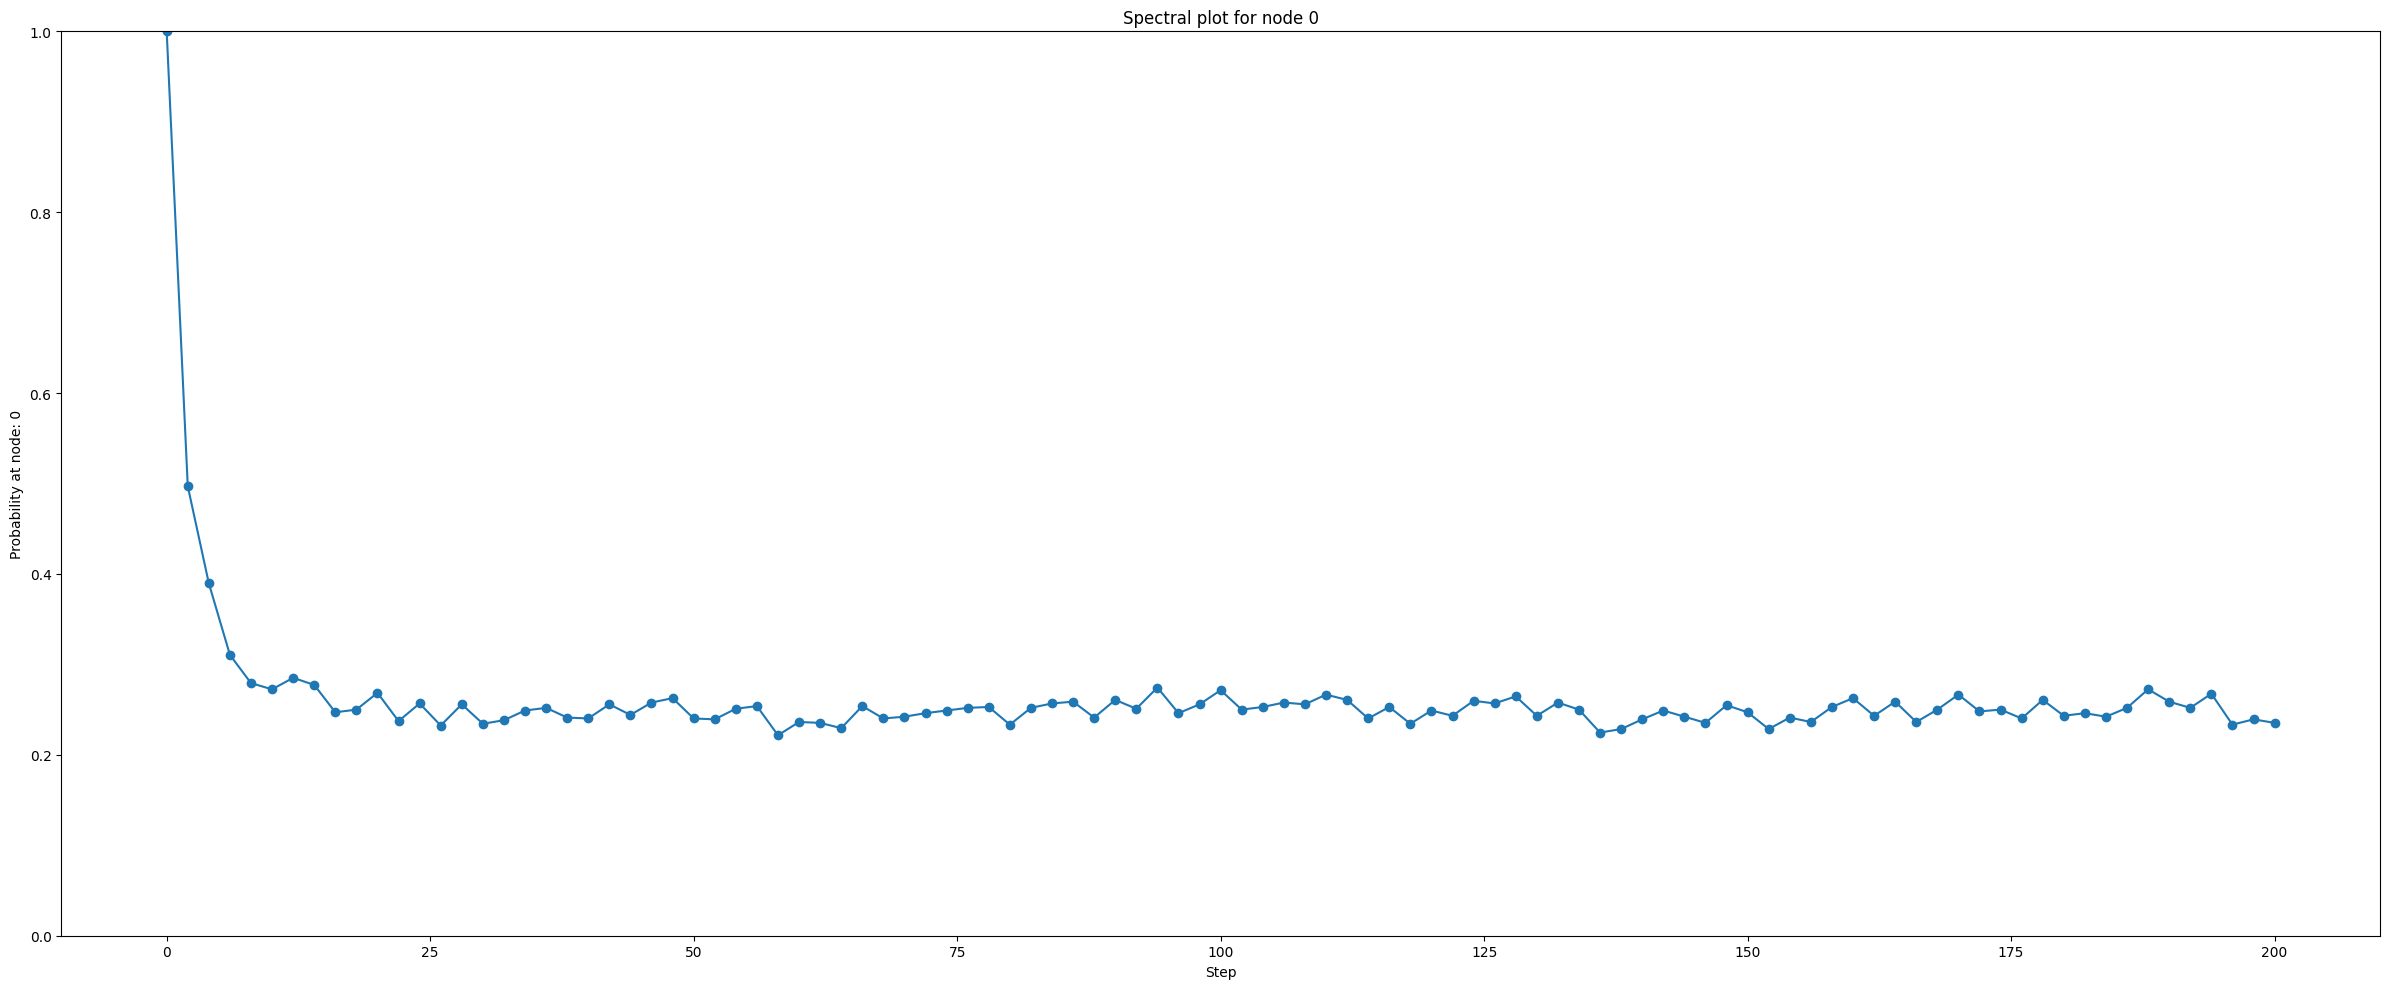

In [49]:
plot_spectral(values, 200, 0)

8


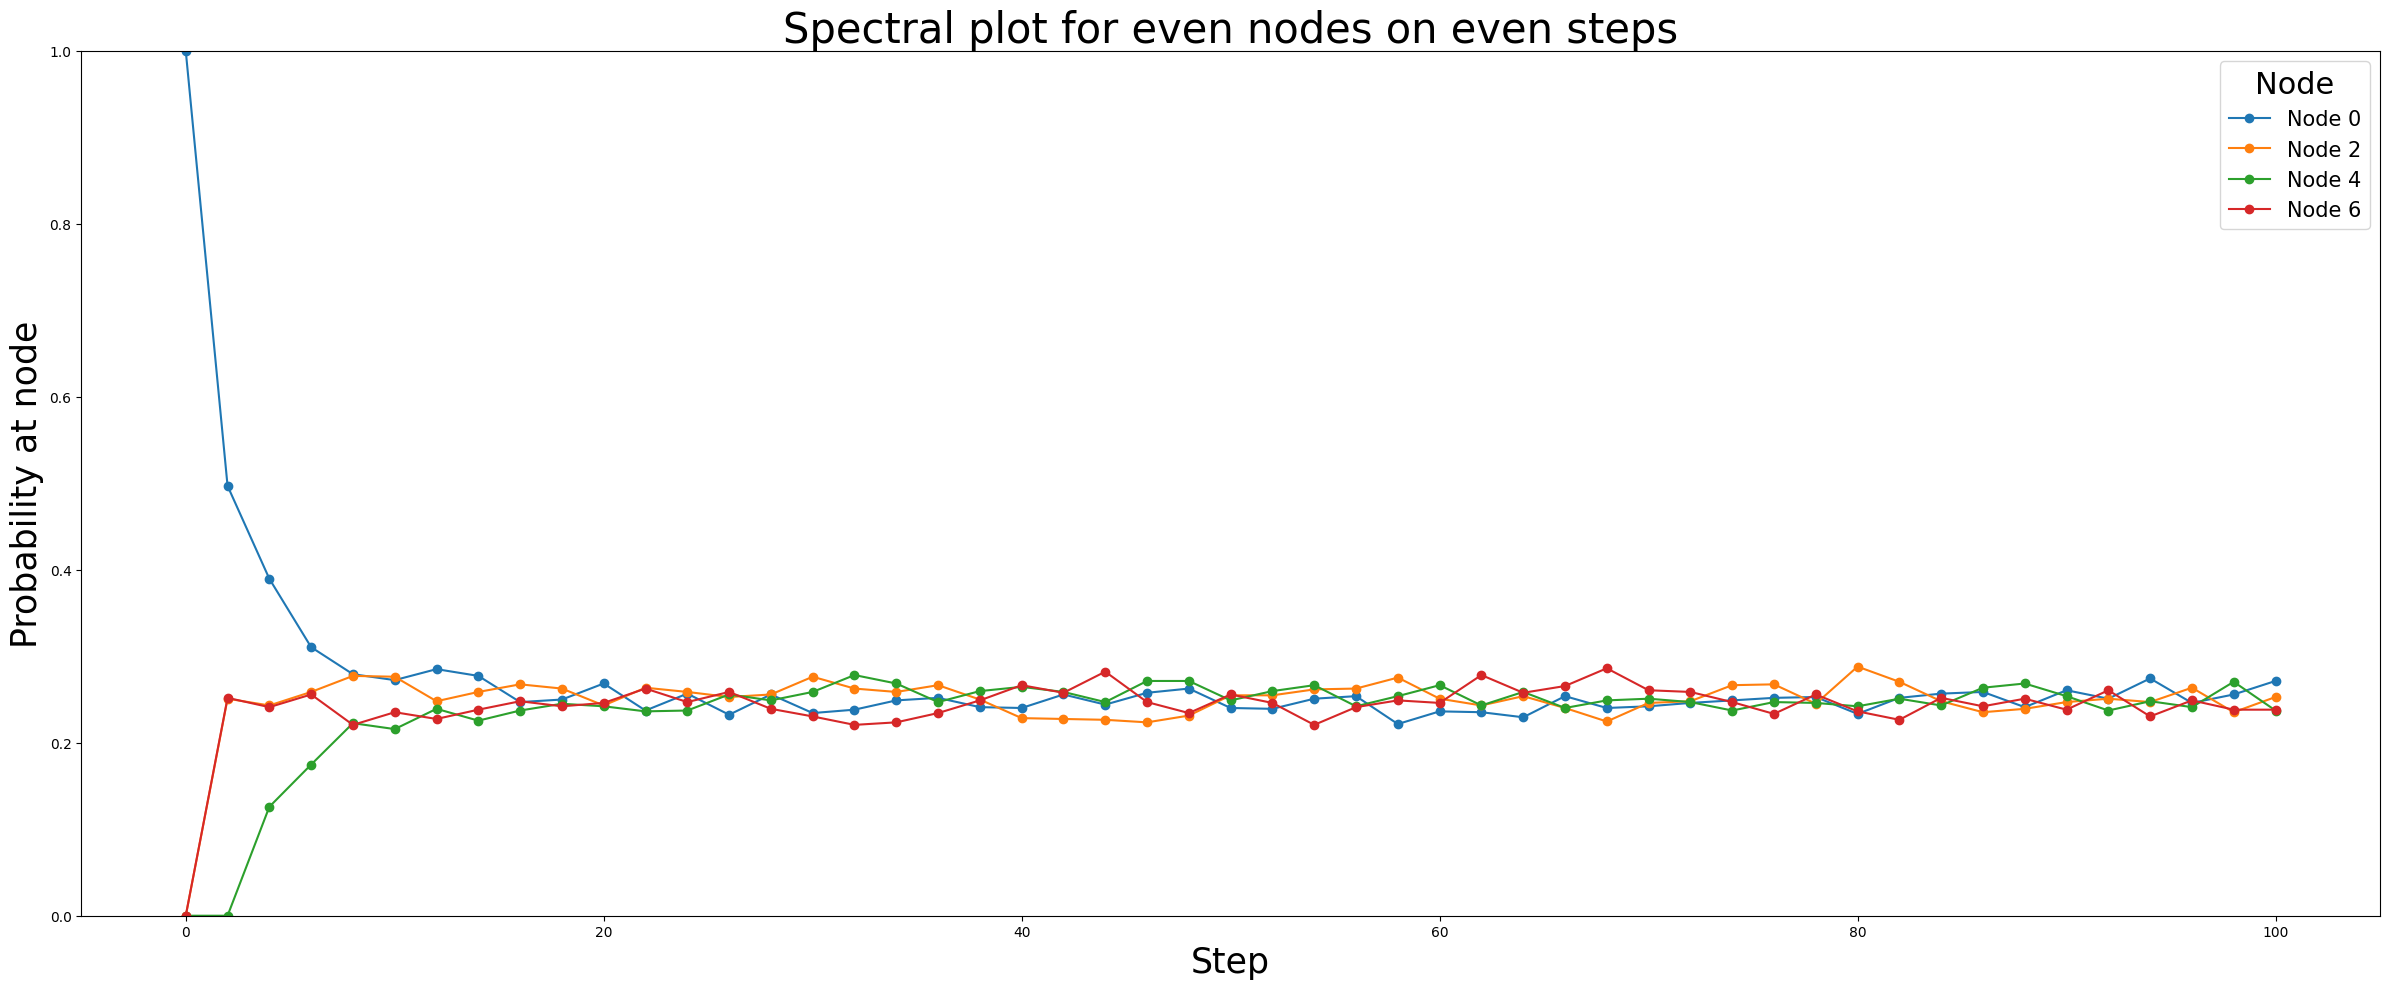

In [68]:
plot_spectral_all(values, 100, 0)

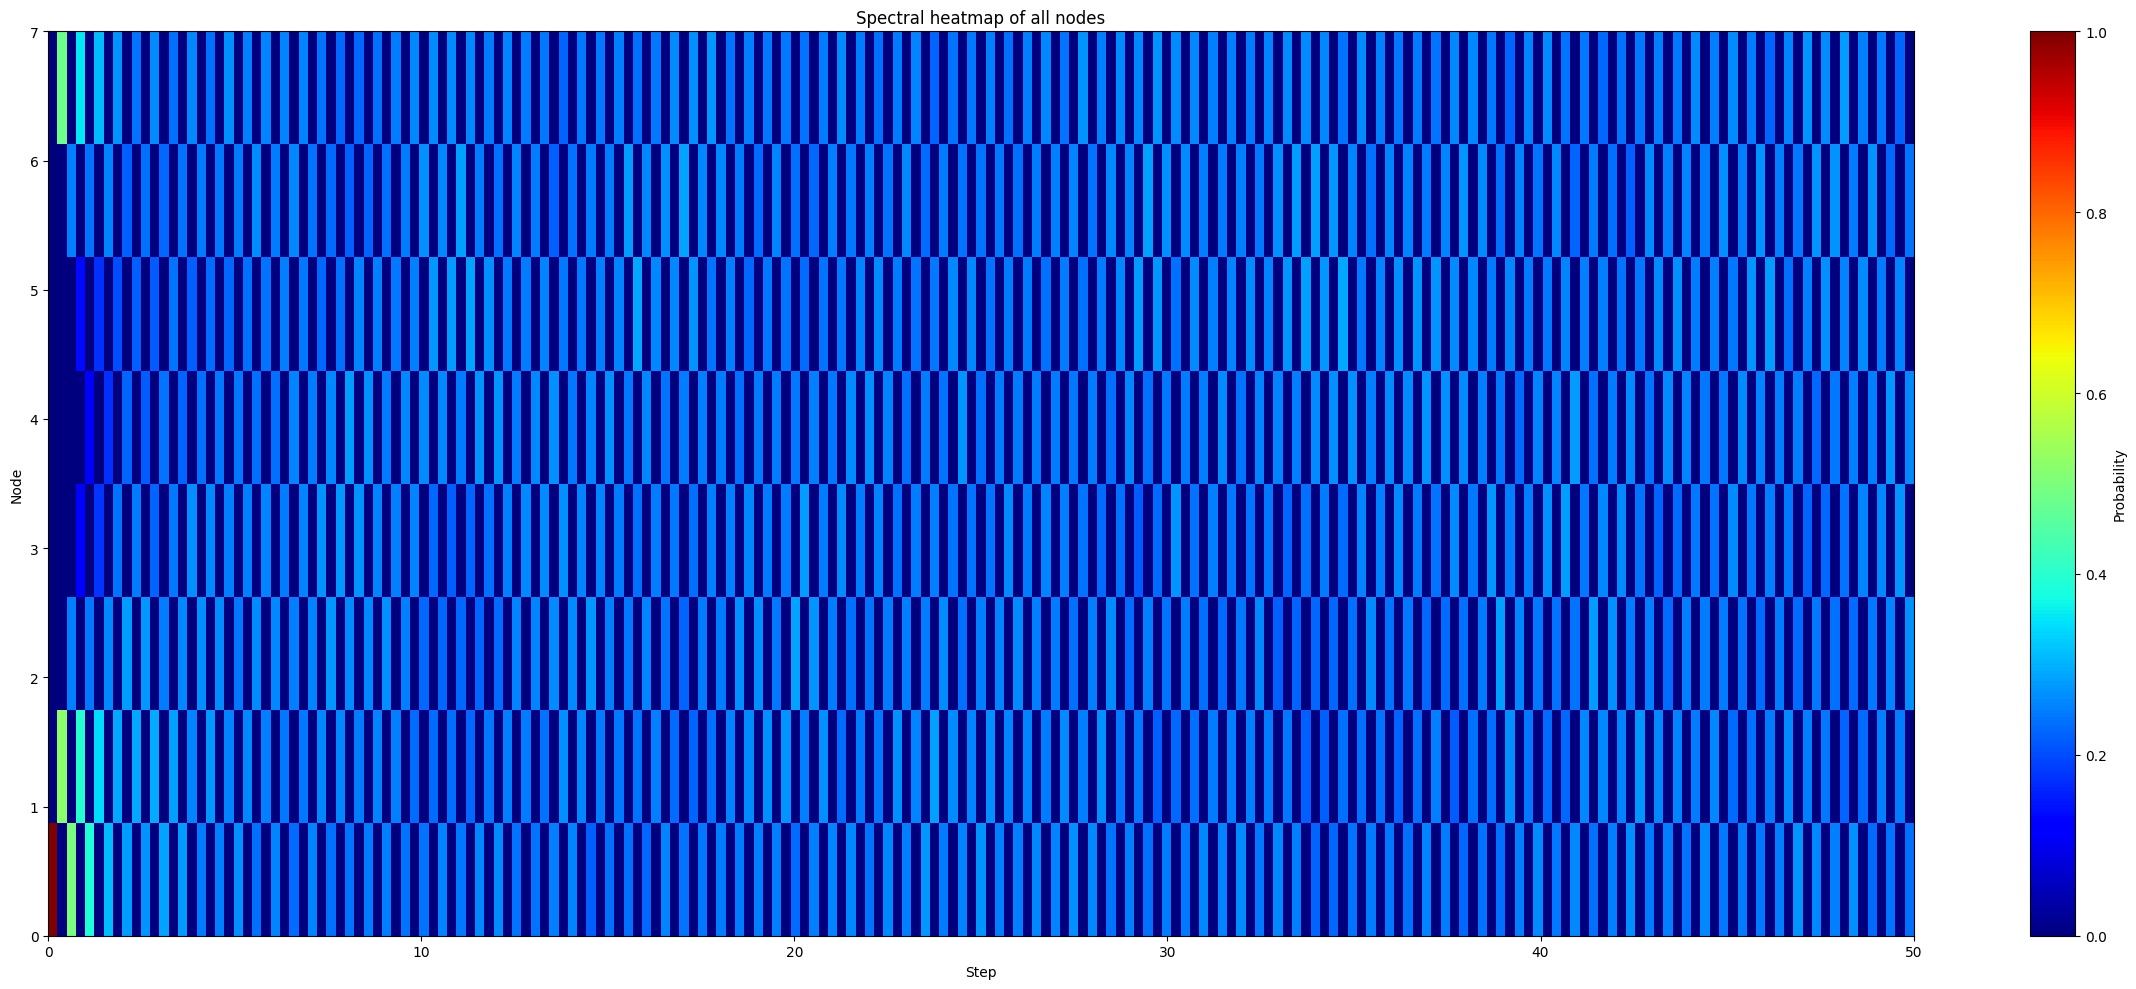

In [58]:
plot_heat_map(values, 50)